<a href="https://colab.research.google.com/github/XueqingWu/Explainable_AI_Global_Explanation/blob/main/Global_Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install shap==0.45.1
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-9oetuapx/alepython_56aa3d9ddb4a4e9bae148a52589c0c54
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-9oetuapx/alepython_56aa3d9ddb4a4e9bae148a52589c0c54
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done


In [2]:

%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import metrics

# Models
import xgboost
from sklearn.model_selection import train_test_split

# XAI
import shap
from alepython import ale_plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

np.random.seed(13)

## Load Data

In [3]:

# load dataset
from sklearn.datasets import load_iris

iris = load_iris()
# convert to dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df
# # Subset data to two classes
iris_df = iris_df[iris.target != 2]
iris_df["target"] = iris.target[iris.target != 2]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [4]:
from sklearn.model_selection import train_test_split

# Assuming iris_df is your DataFrame and target is the column you want to predict
y = iris_df["target"]  # Target variable
X = iris_df.drop("target", axis=1)

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train, X_test, y_train, y_test can be used for training and testing

## Train Model

In [5]:
# Train XGBoost model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = xgboost.XGBClassifier().fit(X_train, y_train)

In [6]:
features = X_train.columns

## Partial Dependence Plots (PDP)

### Impact of Petal Length

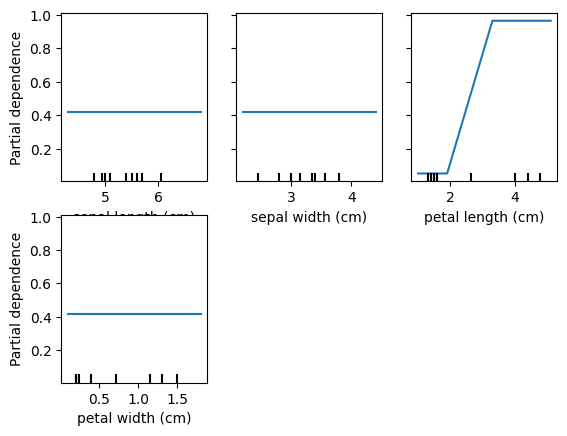

In [7]:

# # Choose the feature of interest
# features =['petal length (cm)']

# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='average') #kind='both'

### Impact of Petal Width

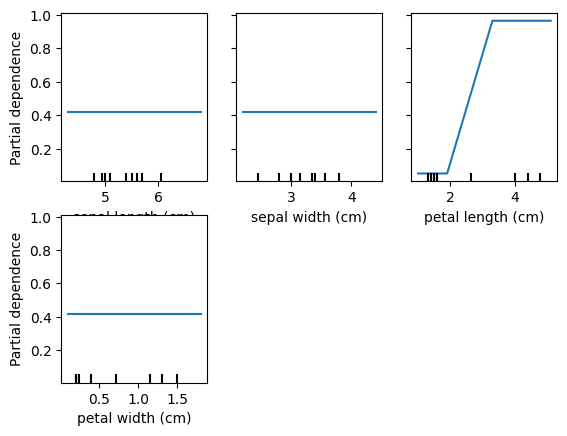

In [8]:
# Choose the feature of interest
# features =['petal width (cm)']

# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='average') #kind='both'

## ALE Plots

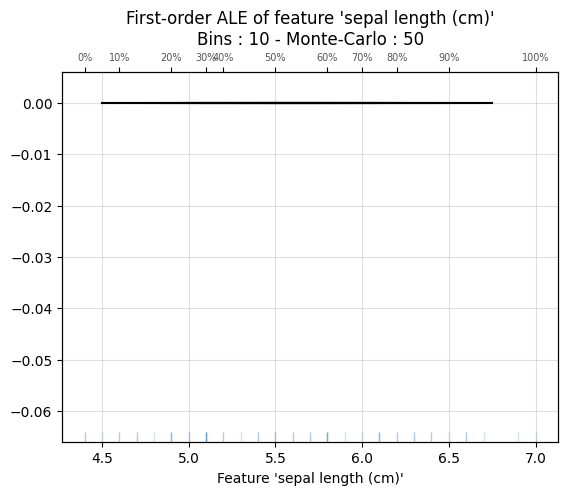

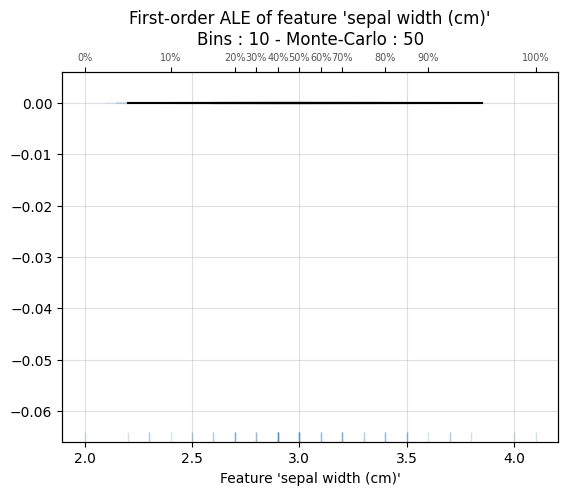

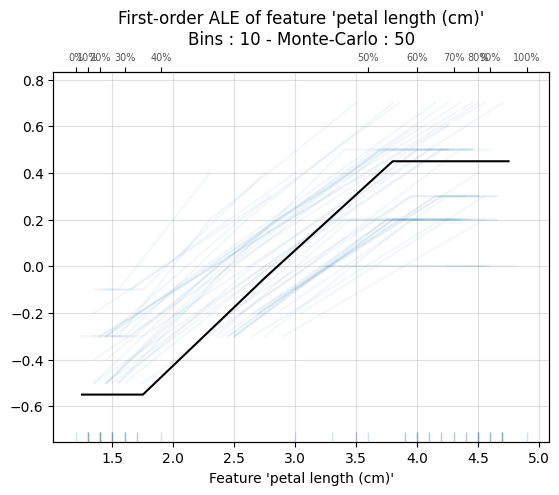

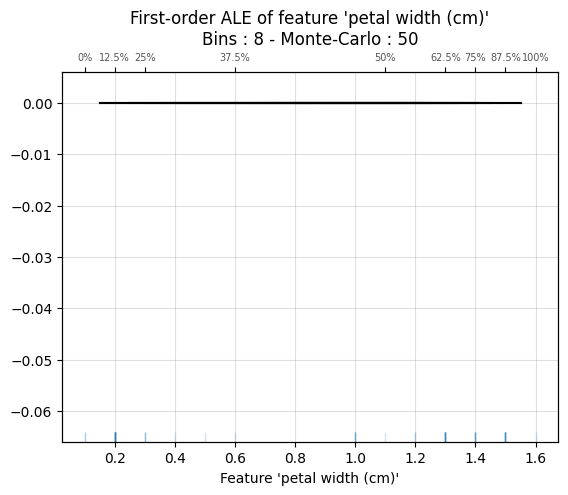

In [10]:
for f in features:
  # Use default parameters for 1D Main Effect ALE Plot
  ale_plot(model, X_train, f, monte_carlo=True)

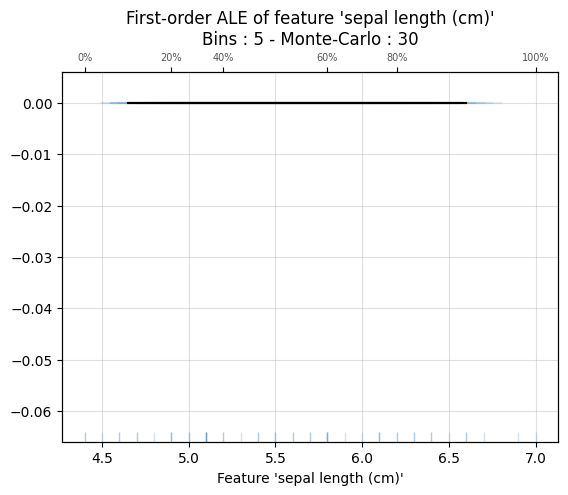

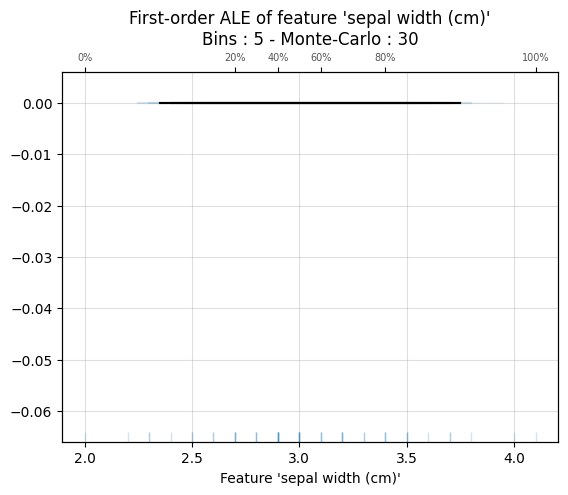

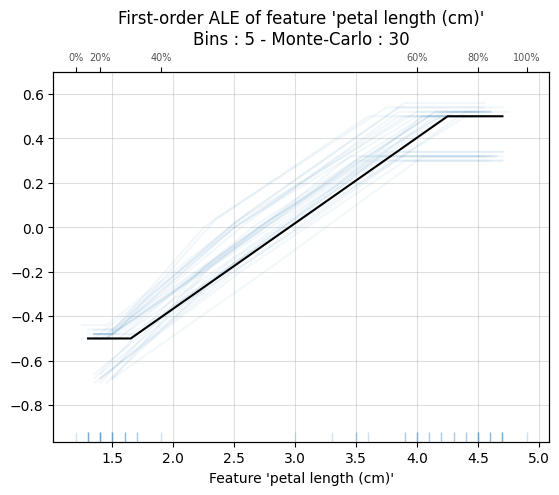

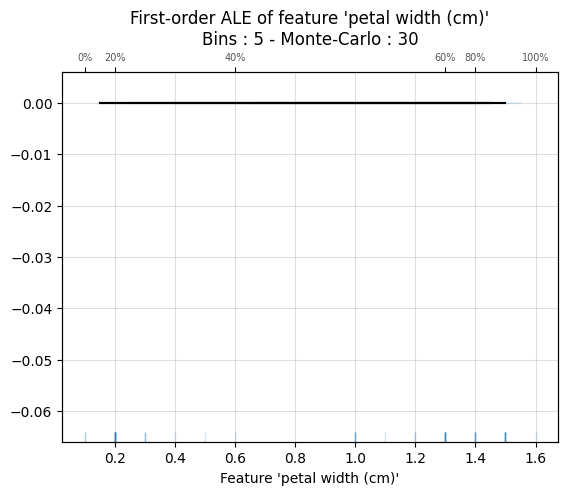

In [11]:

for f in features:
  # Change hyperparameters for 1D Main Effect ALE Plot
  ale_plot(
      model,
      X_train,
      f,
      bins=5,
      monte_carlo=True,
      monte_carlo_rep=30,
      monte_carlo_ratio=0.5,
  )

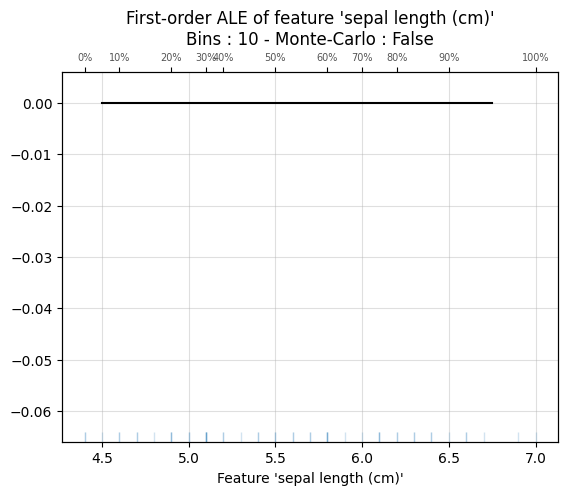

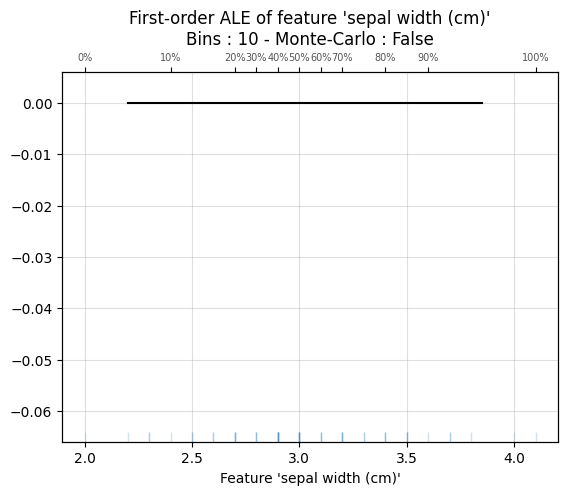

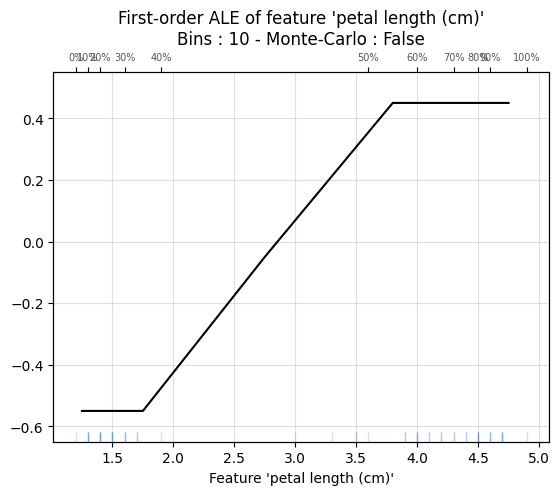

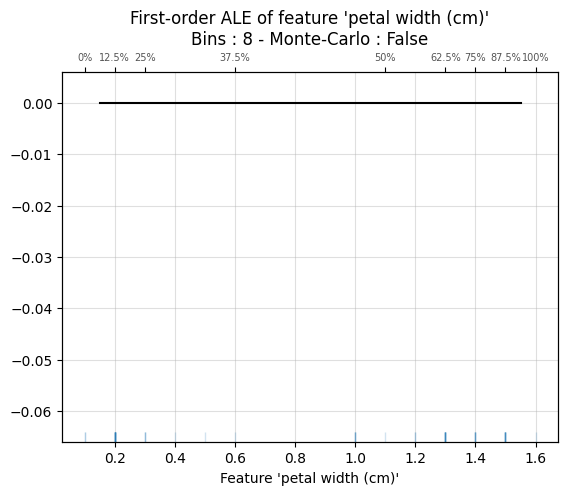

In [12]:
# 2D Second-Order ALE Plot
for f in features:
  ale_plot(model, X_train, f, bins=10)

## ICE Plot

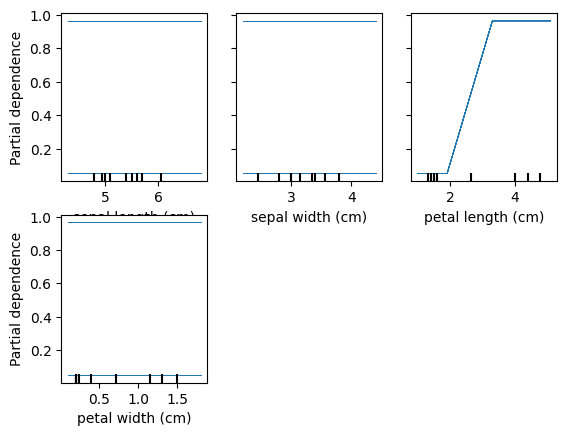

In [13]:



# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='individual') #kind='both'